In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.preprocessing import quantile_transform
%matplotlib inline

In [2]:
datadir = '/datax/scratch/benjb/'

freqs = np.load(datadir + 'C23_L_frequencies.npy', allow_pickle=True)
drifts = np.load(datadir + 'C23_L_driftrates.npy', allow_pickle=True)
snrs = np.load(datadir + 'C23_L_snrs.npy', allow_pickle=True)

In [4]:
batch_1 = np.load(datadir + 'C23_L_batch_1_params.npy', allow_pickle=True)
batch_2 = np.load(datadir + 'C23_L_batch_2_params.npy', allow_pickle=True)
batch_3 = np.load(datadir + 'C23_L_batch_3_params.npy', allow_pickle=True)
batch_4 = np.load(datadir + 'C23_L_batch_4_params.npy', allow_pickle=True)
batch_5 = np.load(datadir + 'C23_L_batch_5_params.npy', allow_pickle=True)
batch_6 = np.load(datadir + 'C23_L_batch_6_params.npy', allow_pickle=True)

In [5]:
batch_1_triad = np.load(datadir + 'batch_1_triad.npy', allow_pickle=True)
batch_2_triad = np.load(datadir + 'batch_2_triad.npy', allow_pickle=True)
batch_3_triad = np.load(datadir + 'batch_3_triad.npy', allow_pickle=True)
batch_4_triad = np.load(datadir + 'batch_4_triad.npy', allow_pickle=True)
batch_5_triad = np.load(datadir + 'batch_5_triad.npy', allow_pickle=True)
batch_6_triad = np.load(datadir + 'batch_6_triad.npy', allow_pickle=True)

In [6]:
triad_array = np.vstack((
    batch_1_triad,
    batch_2_triad,
    batch_3_triad,
    batch_4_triad,
    batch_5_triad,
    batch_6_triad
))

In [7]:
p_array = np.vstack((np.concatenate(batch_1), 
                 np.concatenate(batch_2),
                 np.concatenate(batch_3),
                 np.concatenate(batch_4),
                 np.concatenate(batch_5),
                 np.concatenate(batch_6)
                 ))

In [8]:
print(triad_array.shape)
print(p_array.shape)

(3247546, 3)
(3247546, 9)


In [9]:
param_array_uncut = np.hstack((triad_array, p_array))
print(param_array_uncut.shape)

(3247546, 12)


In [10]:
uncut_freqs = param_array_uncut[:,0]
param_array = param_array_uncut[np.where(
    ((uncut_freqs > 1100) & (uncut_freqs < 1200)) | 
    ((uncut_freqs > 1340) & (uncut_freqs < 1900))
    )]

In [11]:
print(param_array.shape)

(2185987, 12)


In [12]:
print(len(freqs))
print(len(freqs) - len(param_array))

2186151
164


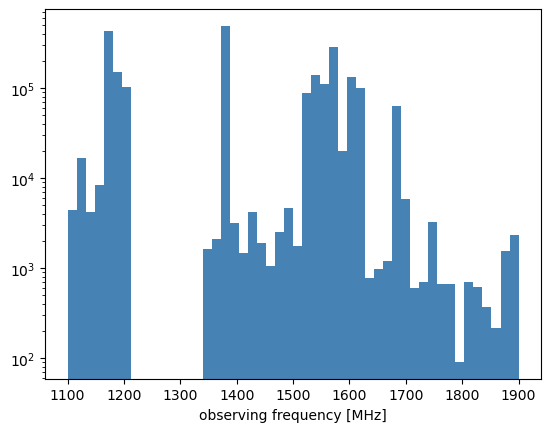

In [13]:
#plt.hist(freqs, range=[1100, 1900], histtype='step', color='steelblue', bins=50)
plt.hist(param_array[:,0], range=[1100, 1900], color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel('observing frequency [MHz]')
plt.show()

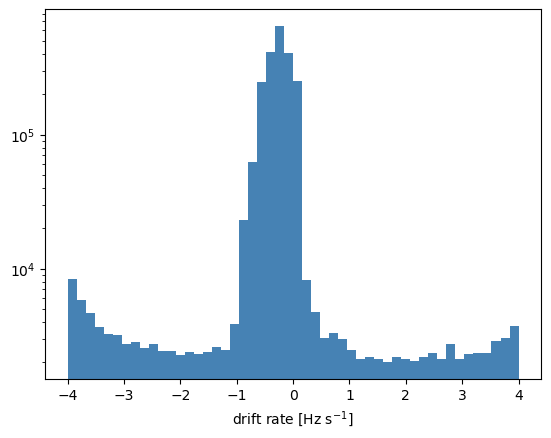

In [54]:
#plt.hist(drifts, range=[-4, 4], color='steelblue', bins=50)
plt.hist(param_array[:,1], range=[-4, 4], color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel(r'drift rate [Hz s$^{-1}$]')
plt.show()

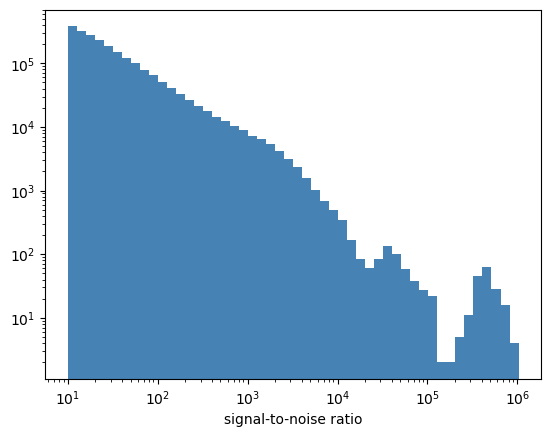

In [55]:
snrs = snrs.astype(float)
snrs = param_array[:, 2]

hist, bins = np.histogram(snrs, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(snrs, color='steelblue', bins=logbins)

#plt.hist(np.log10(snrs.astype(float)), bins=50)
plt.xlabel('signal-to-noise ratio')
plt.xscale('log')
plt.yscale('log')
plt.show()

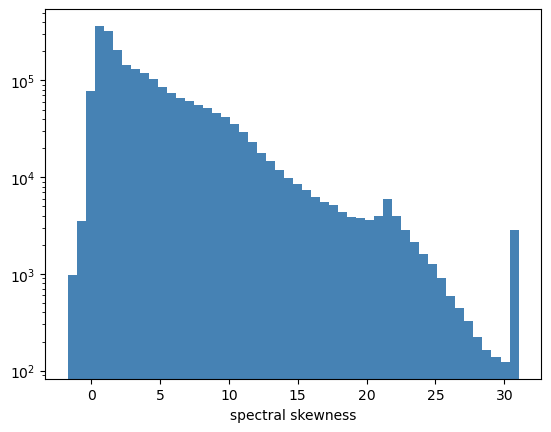

In [66]:
plt.hist(param_array[:,3], color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel(r'spectral skewness')
plt.show()

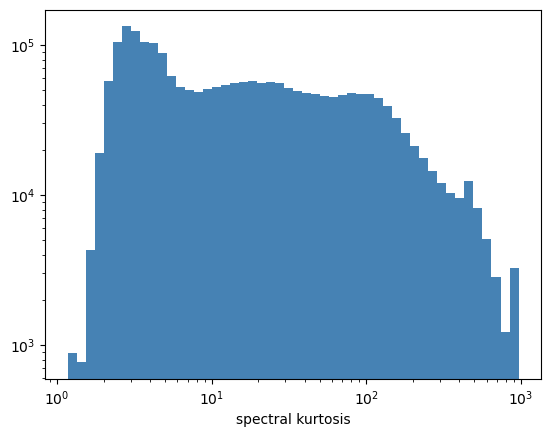

In [67]:
hist, bins = np.histogram(param_array[:,4], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(param_array[:,4], color='steelblue', bins=logbins)

#plt.hist(param_array[:,4], color='steelblue', bins=50)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'spectral kurtosis')
plt.show()

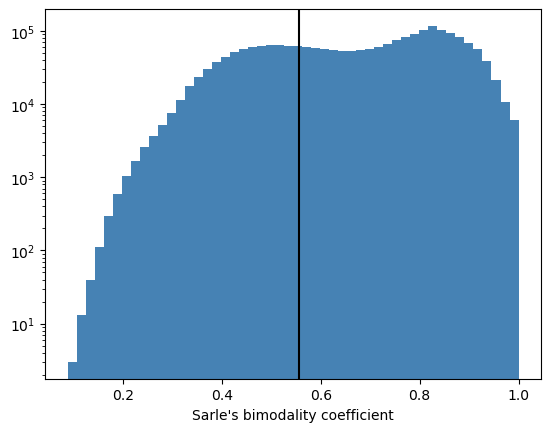

In [68]:
plt.hist(param_array[:,5], color='steelblue', bins=50)
plt.axvline(5/9, color='k')
plt.yscale('log')
plt.xlabel('Sarle\'s bimodality coefficient')
plt.show()

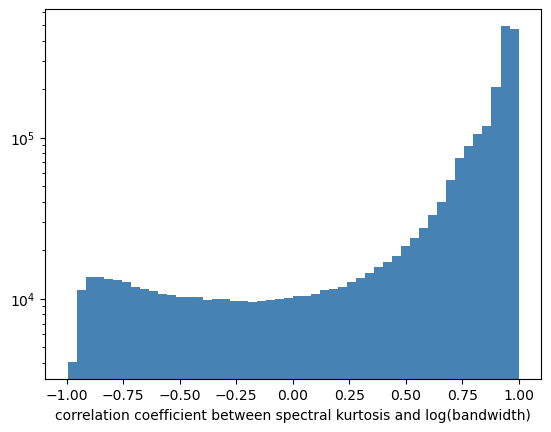

In [71]:
plt.hist(param_array[:,6], color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel('correlation coefficient between spectral kurtosis and log(bandwidth)')
plt.show()

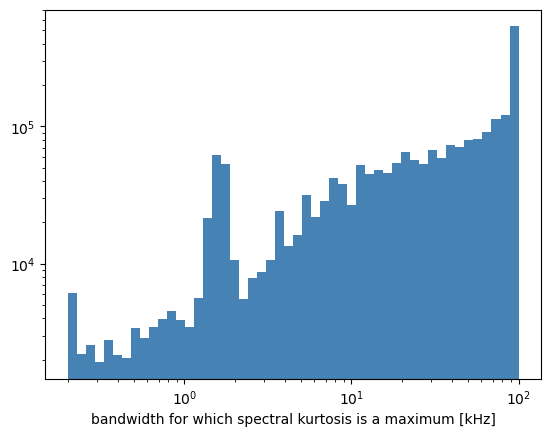

In [81]:
hist, bins = np.histogram(param_array[:,7]*1e3, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(param_array[:,7]*1e3, color='steelblue', bins=logbins)

#plt.hist(param_array[:,7]*1e3, color='steelblue', bins=50)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('bandwidth for which spectral kurtosis is a maximum [kHz]')
plt.show()

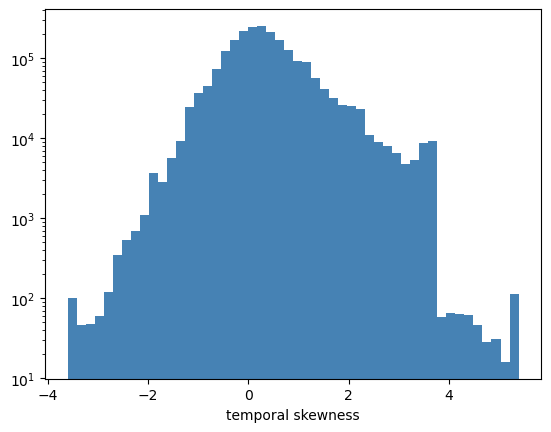

In [79]:
plt.hist(param_array[:,8], color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel('temporal skewness')
plt.show()

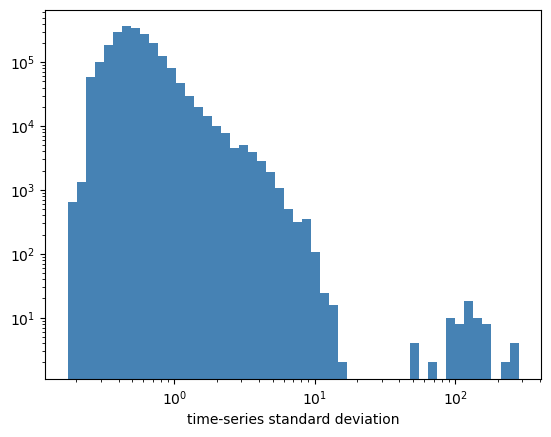

In [83]:
hist, bins = np.histogram(param_array[:,9], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(param_array[:,9], color='steelblue', bins=logbins)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('time-series standard deviation')
plt.show()

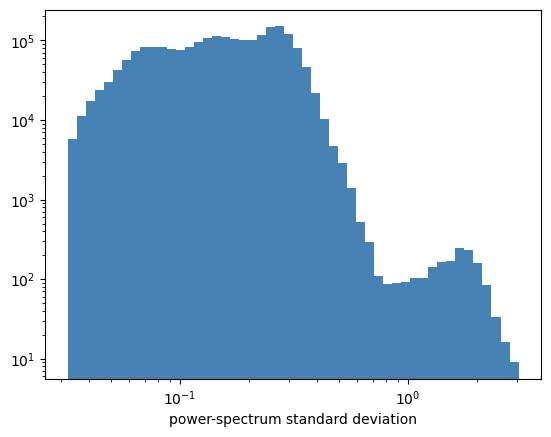

In [84]:
hist, bins = np.histogram(param_array[:,10], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(param_array[:,10], color='steelblue', bins=logbins)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('power-spectrum standard deviation')
plt.show()

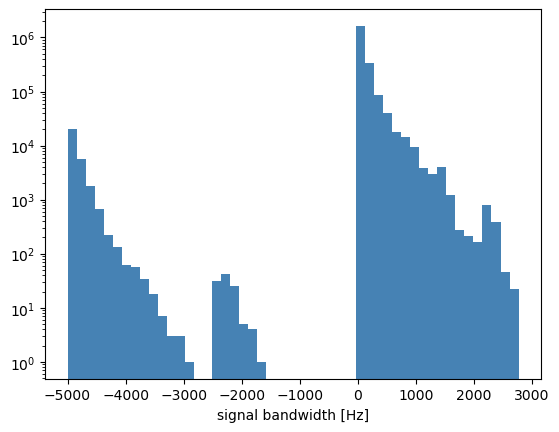

In [88]:
plt.hist(param_array[:,11]*1e6, color='steelblue', bins=50)
plt.yscale('log')
plt.xlabel('signal bandwidth [Hz]')
plt.show()

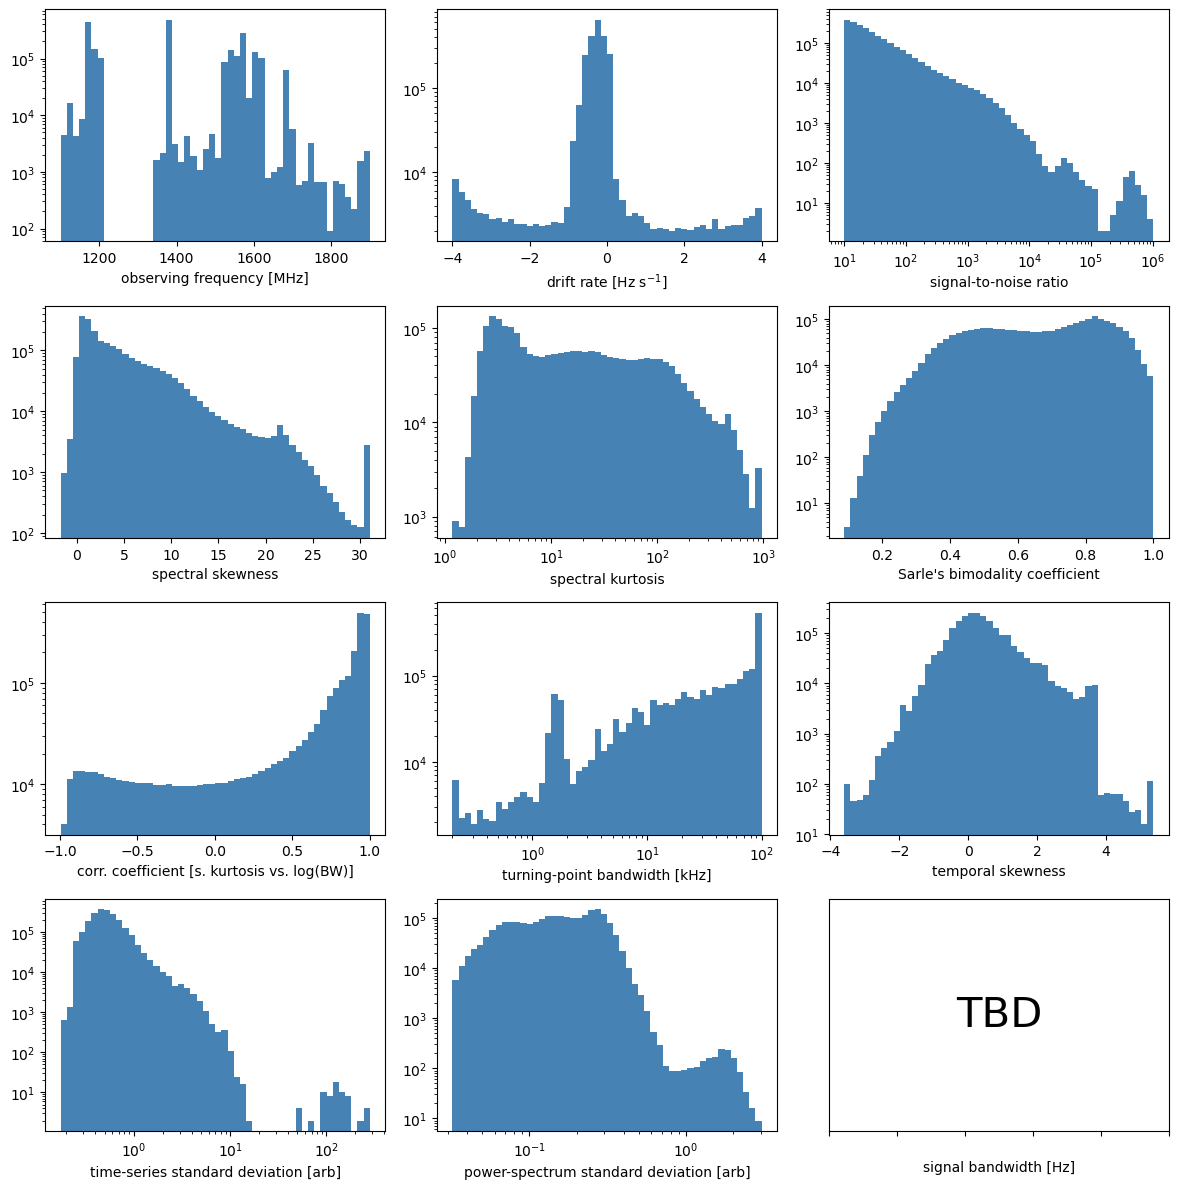

In [30]:
fig, axs = plt.subplots(4, 3, figsize=(12, 12))

# 0: Observing Frequency
axs[0,0].hist(param_array[:,0], range=[1100, 1900], color='steelblue', bins=50)
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel('observing frequency [MHz]')

# 1: Drift Rate
axs[0,1].hist(param_array[:,1], range=[-4, 4], color='steelblue', bins=50)
axs[0,1].set_yscale('log')
axs[0,1].set_xlabel(r'drift rate [Hz s$^{-1}$]')

# 2: SNR
snrs = param_array[:, 2]
hist, bins = np.histogram(snrs, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[0,2].hist(snrs, color='steelblue', bins=logbins)
axs[0,2].set_xlabel('signal-to-noise ratio')
axs[0,2].set_xscale('log')
axs[0,2].set_yscale('log')

# 3: spectral skewness
axs[1,0].hist(param_array[:,3], color='steelblue', bins=50)
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel(r'spectral skewness')

# 4: spectral kurtosis
hist, bins = np.histogram(param_array[:, 4], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[1,1].hist(param_array[:, 4], color='steelblue', bins=logbins)
axs[1,1].set_xlabel('spectral kurtosis')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')

# 5: Sarle's bimodality coefficient
axs[1,2].hist(param_array[:,5], color='steelblue', bins=50)
#axs[1,2].axvline(5/9, color='k')
axs[1,2].set_yscale('log')
axs[1,2].set_xlabel('Sarle\'s bimodality coefficient')

# 6: correlation coefficient
axs[2,0].hist(param_array[:,6], color='steelblue', bins=50)
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel('corr. coefficient [s. kurtosis vs. log(BW)]')

# 7: turning-point bandwidth
hist, bins = np.histogram(param_array[:,7]*1e3, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[2,1].hist(param_array[:,7]*1e3, color='steelblue', bins=logbins)
axs[2,1].set_yscale('log')
axs[2,1].set_xscale('log')
axs[2,1].set_xlabel('turning-point bandwidth [kHz]')

# 8: temporal skewness
axs[2,2].hist(param_array[:,8], color='steelblue', bins=50)
axs[2,2].set_yscale('log')
axs[2,2].set_xlabel('temporal skewness')

# 9: time-series standard deviation
hist, bins = np.histogram(param_array[:, 9], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[3,0].hist(param_array[:, 9], color='steelblue', bins=logbins)
axs[3,0].set_xlabel('time-series standard deviation [arb]')
axs[3,0].set_xscale('log')
axs[3,0].set_yscale('log')

# 10: power-spectrum standard deviation
hist, bins = np.histogram(param_array[:, 10], bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[3,1].hist(param_array[:, 10], color='steelblue', bins=logbins)
axs[3,1].set_xlabel('power-spectrum standard deviation [arb]')
axs[3,1].set_xscale('log')
axs[3,1].set_yscale('log')

# 11: signal bandwidth
#axs[3,2].set_xticks([])
axs[3,2].set_yticks([])
axs[3,2].text(0.5, 0.5, 'TBD', size=30, color='k', horizontalalignment='center', verticalalignment='center', transform=axs[3,2].transAxes)
axs[3,2].set_xlabel('signal bandwidth [Hz]')
[t.set_color('white') for t in axs[3,2].xaxis.get_ticklabels()]

plt.tight_layout()

plt.savefig('/datax/scratch/benjb/1d_param_analysis.pdf')
#plt.subplots_adjust(hspace=0.2)